# Model `ELBMFPyTorch`

The PyTorch implementation by the author.

In [1]:
# use project files rather than the installed PyBMF
 
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

from PyBMF.models.ELBMFPyTorch import ELBMF
from PyBMF.utils import show_matrix

import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

c:\Users\nieht\miniconda3\envs\pybmf\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load `CustomData`

<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\nieht\AppData\Local\Temp\ipykernel_5220\2617460792.py:6: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\PyBMF-bulky\data\data-elbmf\Brain_Cerebellum-z.tsv', header=None, sep='\t')


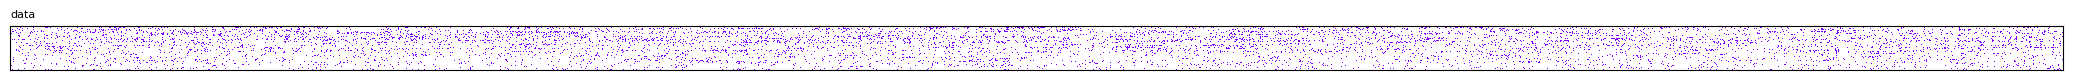

Using custom data of shape: (644, 30243), type: <class 'scipy.sparse._csr.csr_matrix'>
[I] Sampling axis 1 to size 1000
[I]   sampling seed: 1000
[I]   sampling from: (644, 30243)
[I]   sampling to  : (644, 1000)


<Figure size 640x480 with 0 Axes>

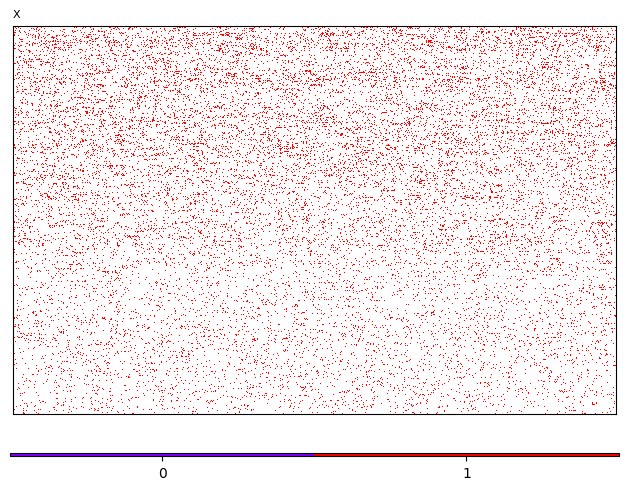

<Figure size 640x480 with 0 Axes>

In [3]:
# loading real-world data from datasets of ELBMF-Julia
# download and extract .tsv file from https://eda.rg.cispa.io/prj/elbmf/

# make sure the data is correctly parsed

df = pd.read_csv('D:\PyBMF-bulky\data\data-elbmf\Brain_Cerebellum-z.tsv', header=None, sep='\t')

X = csr_matrix(df.astype(pd.SparseDtype("float64", 0)).sparse.to_coo())

show_matrix([(X, [0, 0], 'data')])

# wrap it with CustomData(), and crop the data if needed

from PyBMF.datasets import CustomData

data = CustomData(X, name="Brain_Cerebellum-z")
data.load(overwrite_cache=True)

data.sample(factor_id=1, n_samples=1000, seed=1000)
data.show_matrix(scaling=0.25)

# Load synthetic data

In [ ]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

# Load `MovieLensData`

In [4]:
# # loading real-world data

# from PyBMF.datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

# data.show_matrix(scaling=0.5)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


# Split and negative sampling

Here `NoSplit` is used, which means `X_train`, `X_val` and `X_test` point to the same data `data.X`.

With `split.negative_sample`, zeros are added to the sparse matrix. The number of zeros is set to be equal to the number of ones, which is `split.pos_size`.

In [4]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')
split.negative_sample(
    size=split.pos_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1724123108
[I]   train_size   : 53079
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1724123108
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 590921
[I]   n_negatives  : 53079
[I]   train_size   : 53079
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


# `ELBMFPyTorch`

`ELBMFPyTorch` is a wrapper of the PyTorch implementation from the author of the ELBMF paper.

This is experimental and will be removed in the future. The final version of the model will be `models/ELBMF.py`.

[I] k            : 100
[I] U            : None
[I] V            : None
[I] init_method  : uniform
[I] reg_l1       : 0
[I] reg_l2       : 0.02
[I] reg_growth   : 1.0002
[I] max_iter     : 5000
[I] min_diff     : 1e-08
[I] beta         : 0
[I] seed         : 1724123165
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-20 11-06-05-231239 ELBMF
[I] U, V existed. Skipping initialization.
torch.Size([644, 1000]) <class 'torch.Tensor'>
100
[[0.01424158 0.0519749  0.01055401 ... 0.03444952 0.00714712 0.05288534]
 [0.04807831 0.01536739 0.01966905 ... 0.00321445 0.01610294 0.01742979]
 [0.01422025 0.03332966 0.04576692 ... 0.01579816 0.03282311 0.01431636]
 ...
 [0.03646684 0.01283388 0.03738174 ... 0.04293907 0.00314215 0.04689532]
 [0.03162615 0.03279208 0.02790783 ... 0.00057141 0.00222689 0.01220574]
 [0.03927452 0.03516303 0.00915702 ... 0.00988349 0.05391938 0.03285929]]
[[

[I] error: 34536.0430, U: [0.0000, 3.1700], V: [0.0000, 0.7215]:  29%|██▉       | 1444/5000 [00:12<00:29, 119.83it/s]


[I] Converged
[I] time elapsed :  12s
[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] model saved as: 2024-08-20 11-06-05-231239 ELBMF.pickle


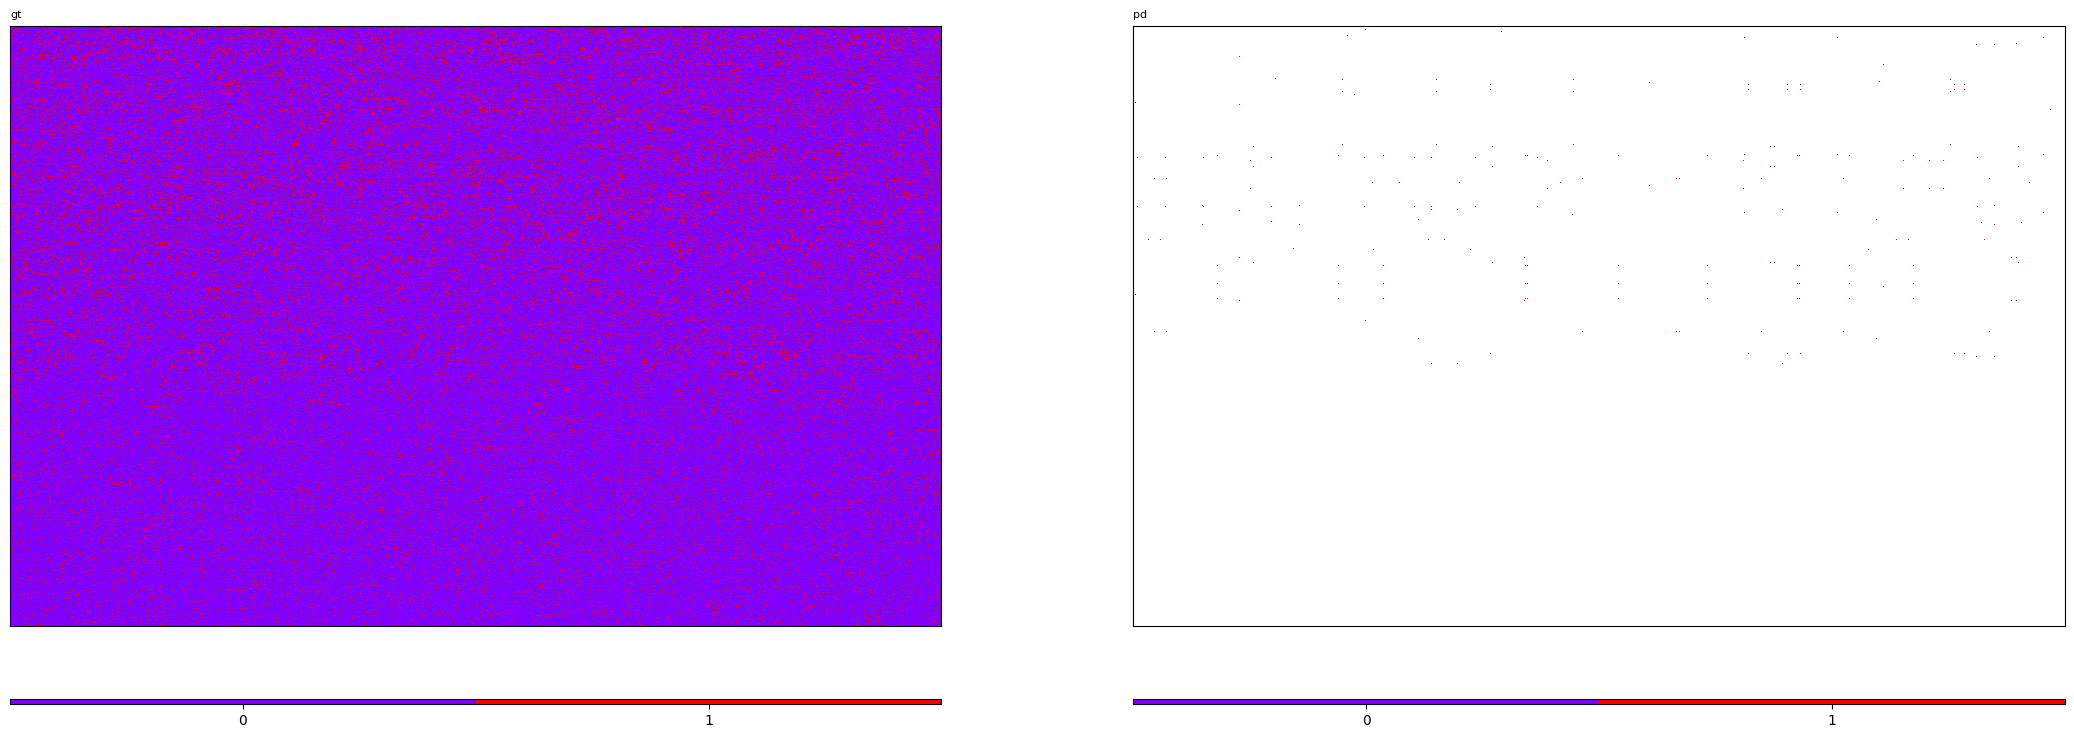

train                            
                             0                            
                time    Recall Precision  Accuracy      F1
0  20/08/24 11:06:17  0.003919    0.8125  0.917828  0.0078

<Figure size 640x480 with 0 Axes>

In [6]:
k = 100
reg_l1 = 0 # 0.01
reg_l2 = 0.02
reg_growth = 1.0002
max_iter = 5000
min_diff = 1e-8
beta = 0 # 0.0001
seed = None
task = 'reconstruction'

# init U, V with uniform distribution
U, V, init_method = None, None, 'uniform'

# init U, V by importing results from NMF
# U, V, init_method = model_nmf.U.copy(), model_nmf.V.copy(), 'custom'

model = ELBMF(k=k, U=U, V=V, init_method=init_method, reg_l1=reg_l1, reg_l2=reg_l2, reg_growth=reg_growth, max_iter=max_iter, min_diff=min_diff, beta=beta, seed=seed)
model.fit(X_train=X_train, task=task)

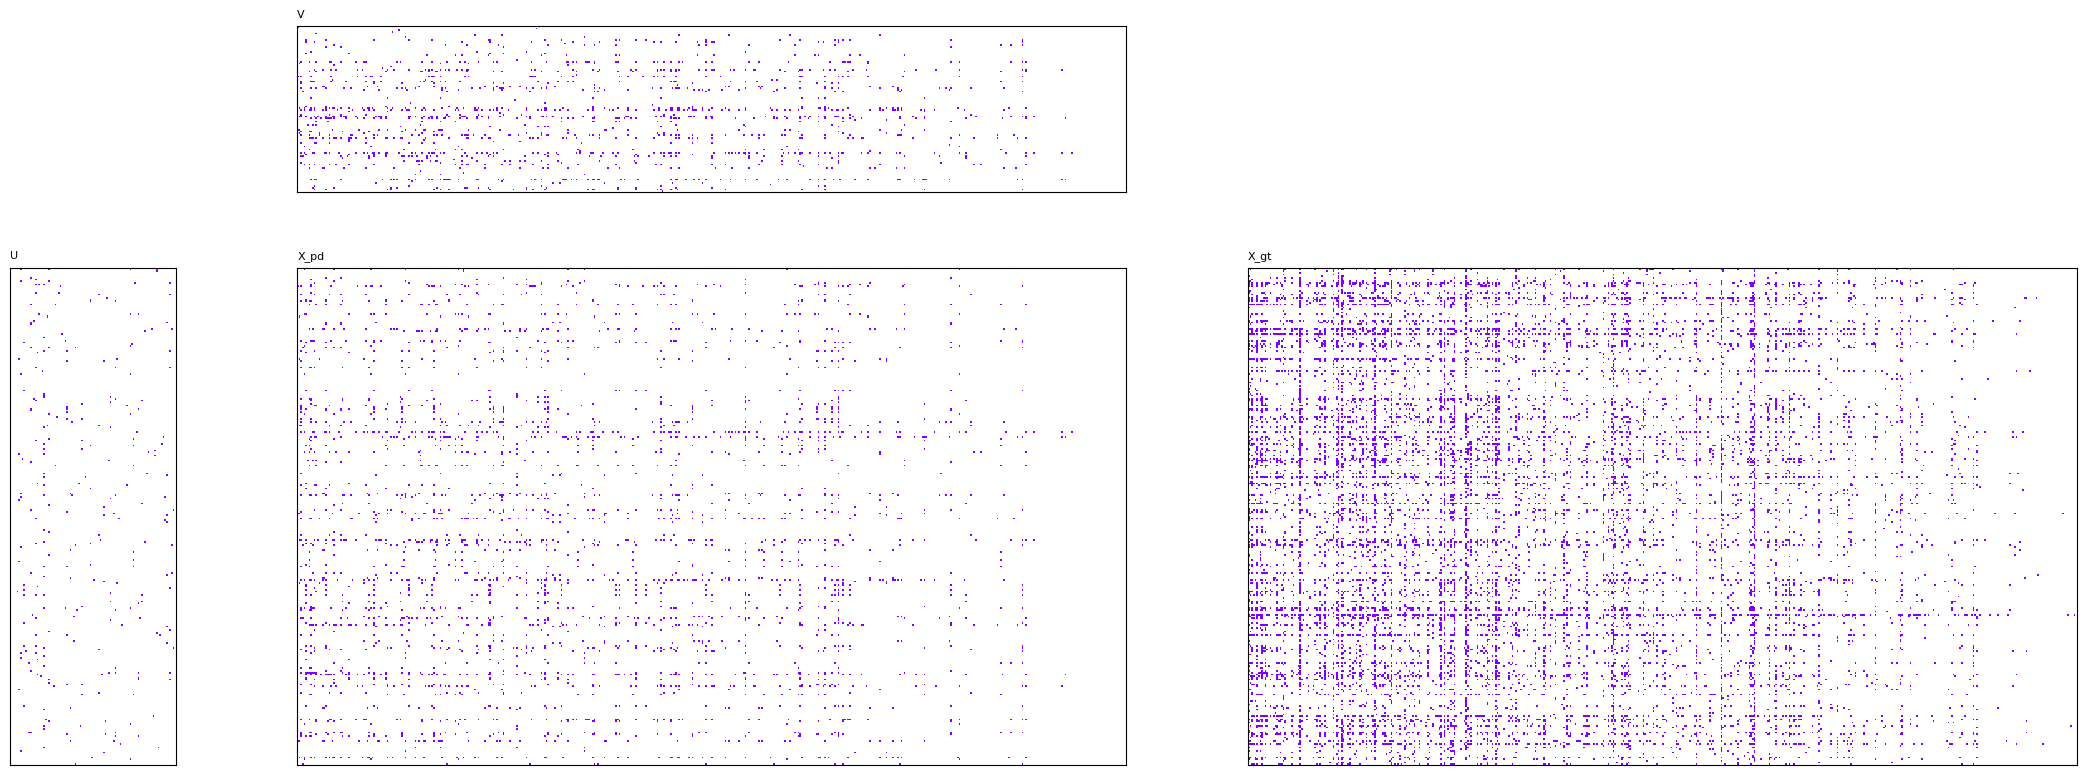

<Figure size 640x480 with 0 Axes>

In [14]:
import numpy as np
import torch
from models.ELBMF import elbmf

X = np.array(X_train.toarray(), dtype=np.float64)
X = torch.from_numpy(X).float()

import torch
from models import ELBMF

U, V = elbmf(
    X                   = X,                  # a Boolean n*m matrix  
    n_components        = 100,                 # number of components
    l1reg               = 0.001,               # l1 coefficient
    l2reg               = 0.002,               # l2 coefficient
    regularization_rate = lambda t: 1.0025**t,  # monotonically increasing regularization-rate function
    maxiter             = 10000,               # maximum number of iterations
    tolerance           = 1e-8,               # the threshold to the absolute difference between the current and previous losses determines the convergence
    beta                = 0.0,             # inertial coefficient of iPALM
    callback            = None,               # e.g. lambda t, U, V, fn: print(t, fn)
    with_rounding       = True)               # rounds U and V in case of early stopping



from utils import show_matrix, matmul
from scipy.sparse import csr_matrix

U_sparse, V_sparse = csr_matrix(U), csr_matrix(V)
X_sparse = matmul(U_sparse, V_sparse, boolean=True, sparse=True)
X_original = csr_matrix(X)

show_matrix([(U_sparse, [1, 0], 'U'), (V_sparse, [0, 1], 'V'), (X_sparse, [1, 1], 'X_pd'), (X_original, [1, 2], 'X_gt')])